# Analysis of the splitting strategy

In this notebook, we analyze the splitting strategy of the python course. 

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Tooling

In [61]:
def compare_two_strategies(csv_path1: str, csv_path2: str, plot_type: str) -> None:
    """
    Plot chunk statistics for two CSV files in subplots.

    Parameters
    ----------
    csv_path1 : str
        Path to the first CSV file containing chunk statistics.
    csv_path2 : str
        Path to the second CSV file containing chunk statistics.
    plot_type : str
        Type of plot ('tokens' or 'characters'). Determines whether to plot the number of tokens or characters.
    """
    # Validate plot_type
    if plot_type not in ['tokens', 'characters']:
        raise ValueError("plot_type must be either 'tokens' or 'characters'")
    
    # Determine the index based on plot_type
    index_map = {'tokens': 3, 'characters': 2}
    i = index_map[plot_type]
    
    # Load the CSV files
    df1 = pd.read_csv(csv_path1)
    df2 = pd.read_csv(csv_path2)
    
    # Create subplots
    fig, axs = plt.subplots(1, 2, figsize=(14, 7))
    
    # Plot the first CSV file
    sns.barplot(x=df1.iloc[:, 0], y=df1.iloc[:, i], hue=df1.iloc[:, 1], dodge=False, ax=axs[0])
    axs[0].set_xlabel('Chunk ID')
    axs[0].set_ylabel(f'Number of {plot_type.capitalize()}')
    axs[0].set_title(f'Number of {plot_type.capitalize()} per Chunk ID\n(File: {csv_path1.split("/")[-1]})')
    axs[0].legend_.remove()

    # Plot the second CSV file
    sns.barplot(x=df2.iloc[:, 0], y=df2.iloc[:, i], hue=df2.iloc[:, 1], dodge=False, ax=axs[1])
    axs[1].set_xlabel('Chunk ID')
    axs[1].set_ylabel(f'Number of {plot_type.capitalize()}')
    axs[1].set_title(f'Number of {plot_type.capitalize()} per Chunk ID\n(File: {csv_path2.split("/")[-1]})')
    axs[1].legend_.remove()
    
    # Combine the two legends
    handles, labels = axs[1].get_legend_handles_labels()
    fig.legend(handles, labels, title='Chapter', bbox_to_anchor=(0.85, 0.5), loc='center left')

    # Adjust x-axis ticks for readability
    for ax in axs:
        ax.set_xticks(ax.get_xticks()[::len(ax.get_xticks()) // 10])
    
    plt.tight_layout(rect=[0, 0, 0.85, 1])
    plt.show()

## Analysis

In [62]:
# Load the CSV files
stats_by_headers_path = '../../chroma_db_by_headers_chunks_stats.csv'
stats_by_headers_and_chars_path = '../../chroma_db_chunks_stats.csv'

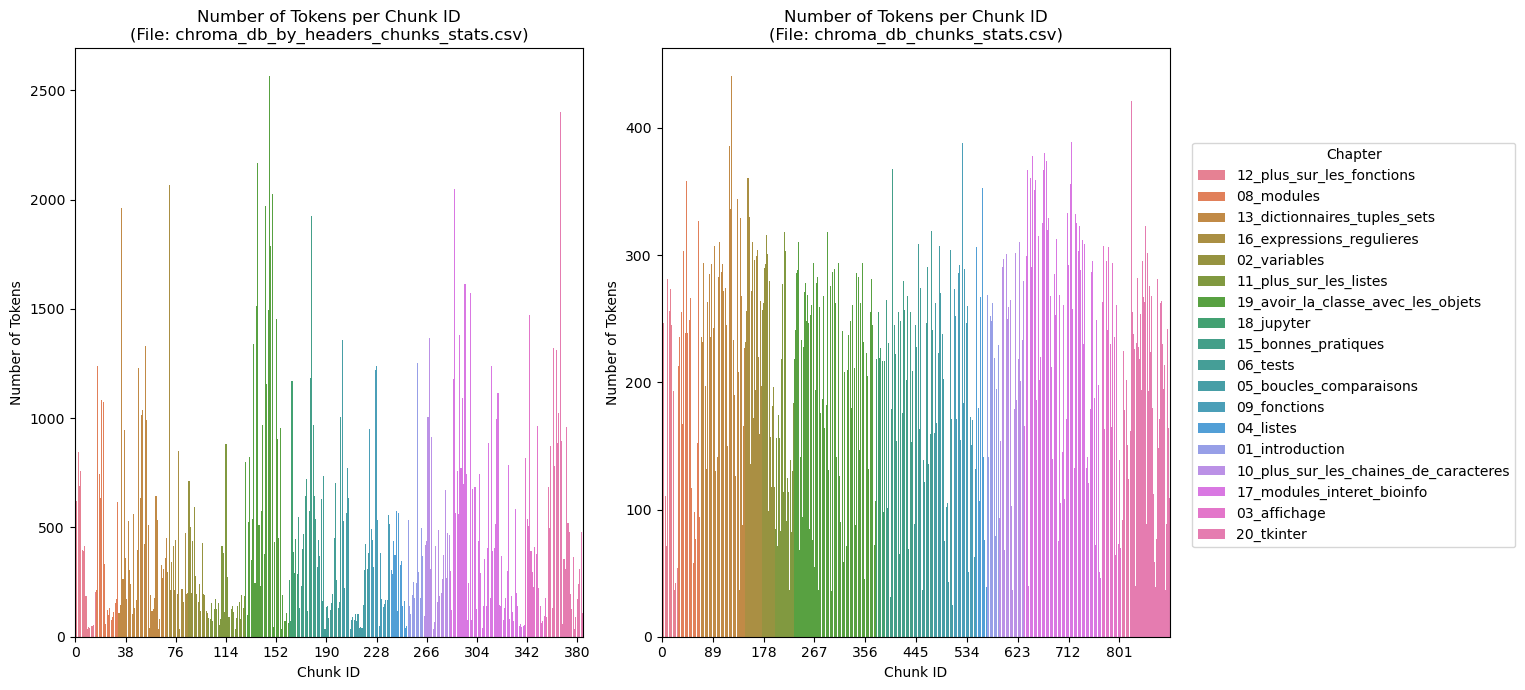

In [63]:
# Plot the number of tokens per chunk ID for each splitting strategy
compare_two_strategies(stats_by_headers_path, stats_by_headers_and_chars_path, 'tokens')

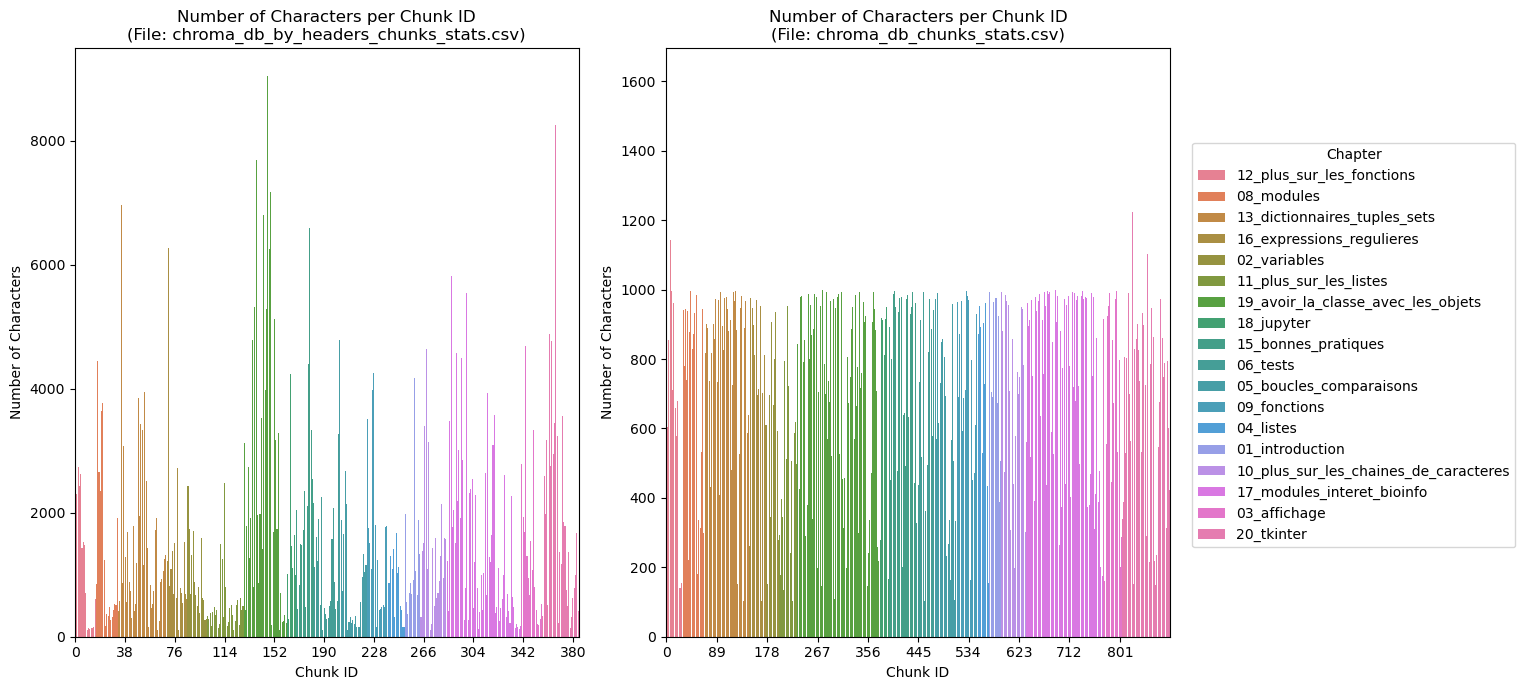

In [64]:
# Plot the number of characters per chunk ID for each splitting strategy
compare_two_strategies(stats_by_headers_path, stats_by_headers_and_chars_path, 'characters')